In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as si

ModuleNotFoundError: No module named 'matplotlib'

In [17]:
# Вариант 6
p = np.array(
    [
        [1.002, 0.166],
        [1.021, 0.505],
        [1.057, 0.857],
        [1.114, 1.232],
        [1.196, 1.647],
        [1.311, 2.118],
        [1.463, 2.668],
        [1.667, 3.334],
        [1.946, 4.173],
        [2.340, 5.288],
    ]
)
# p = [[0.032,0.171],
#     [0.262,0.630],
#     [0.818,1.221],
#     [1.711,1.732],
#     [2.259,1.903],
#     [3.440,1.992],
#     [4.567,1.735],
#     [5.465,1.230],
#     [6.019,0.641]]

In [8]:
def f_0(t: float) -> float:
    if t < -1:
        return 0
    elif -1 <= t < 0:
        return ((t + 1) ** 2) / 2
    elif 0 <= t < 1:
        return -((t + 1) ** 2) + 3 * (t + 1) - 3 / 2
    elif 1 <= t < 2:
        return ((t + 1) ** 2) / 2 - 3 * (t + 1) + 9 / 2
    elif 2 <= t:
        return 0

In [9]:
def f_i(i: int, t: float) -> float:
    return f_0(t - i)

In [10]:
def P(t: float) -> list:
    to_return_x = 0.0
    to_return_y = 0.0
    for idx, point in enumerate(p):
        to_return_x += f_i(idx, t) * point[0]
        to_return_y += f_i(idx, t) * point[1]
    return [round(to_return_x, 5), round(to_return_y, 5)]

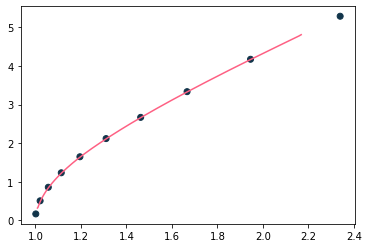

In [99]:
spline = []
q = []


def draw():
    t_list = [el for el in np.arange(0.95, 9.15, 0.05)]
    global spline
    spline = [P(el) for el in t_list]
    q_list = [el for el in np.arange(0, len(p), 1)]
    global q
    q = [P(el) for el in q_list]
    x = [el[0] for el in spline]
    y = [el[1] for el in spline]
    plt.plot(x, y, "#FE6083")

    x = p[:, 0]
    y = p[:, 1]
    plt.scatter(x, y, c=["#11344A" for _ in np.arange(10)])

    # x = p[:, 0]
    # y = p[:, 0]
    # plt.scatter(x, y)


draw()

In [12]:
# Trad splines
def get_a(x_0, y_0, x_1, y_1, c_0):
    return (y_0 * x_1 - y_1 * x_0 - c_0 * (x_1 - x_0)) / (x_0 * x_1 * (x_0 - x_1))


print("a_0: ", get_a(p[0][0], p[0][1], p[1][0], p[1][1], 1))
print("a_1: ", get_a(p[1][0], p[1][1], p[2][0], p[2][1], -261.6458005460837))


def get_b(x_0, y_0, x_1, y_1, c_0):
    return (y_0 * x_1**2 - y_1 * x_0**2 - c_0 * (x_1**2 - x_0**2)) / (x_0 * x_1 * (x_1 - x_0))


print("b_0: ", get_b(p[0][0], p[0][1], p[1][0], p[1][1], 1))
print("b_1: ", get_b(p[1][0], p[1][1], p[2][0], p[2][1], -261.6458005460837))


def get_c(x_1, y_1, x_2, y_2, a_0, b_0):
    return (y_1 * (x_2**2 - 2 * x_1 * x_2) + y_2 * x_1**2 - x_1 * x_2 * (x_2 - x_1) * (2 * a_0 * x_1 + b_0)) / (
        (x_2 - x_1) ** 2
    )


print(
    "c_1: ",
    get_c(p[1][0], p[1][1], p[2][0], p[2][1], 18.290343381488047, -19.159259397592344),
)

a_0:  106.49580982409557
a_1:  -1222.4813254275382
b_0:  -29.314115914371058
b_1:  1321.342781102029
c_1:  4.452061903808078


In [13]:
def get_trad_spline_func(p: list):
    list_of_coef = []
    c_0 = 1
    a_0 = get_a(p[0][0], p[0][1], p[1][0], p[1][1], 1)
    b_0 = get_b(p[0][0], p[0][1], p[1][0], p[1][1], 1)
    list_of_coef.append([p[0], [a_0, b_0, c_0]])
    idx = 1
    for point in p[1:-1]:
        c = get_c(
            point[0],
            point[1],
            p[idx + 1][0],
            p[idx + 1][1],
            list_of_coef[idx - 1][1][0],
            list_of_coef[idx - 1][1][1],
        )
        a = get_a(point[0], point[1], p[idx + 1][0], p[idx + 1][1], c)
        b = get_b(point[0], point[1], p[idx + 1][0], p[idx + 1][1], c)
        list_of_coef.append([point, [a, b, c]])
        idx += 1

    def func(t: float) -> float:
        idx = 0
        while idx < len(p) - 1 and t > p[idx][0]:
            idx += 1
        if idx != 0:
            idx -= 1

        return list_of_coef[idx][1][0] * t**2 + list_of_coef[idx][1][1] * t + list_of_coef[idx][1][2]

    return func


get_trad_spline_func(p)(1.114)

-3.5441036298795154

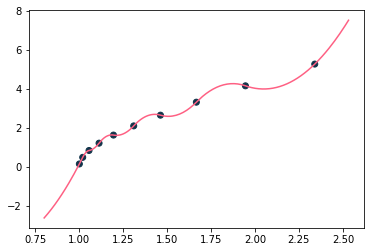

In [97]:
trad_spline = []


def trad_draw():
    t_list = [el for el in np.arange(p[0][0] - 0.2, p[-1][0] + 0.2, 0.01)]
    global trad_spline
    trad_func = get_trad_spline_func(p)
    x = [el for el in t_list]
    y = [trad_func(el) for el in t_list]
    trad_spline = [[el[0], el[1]] for el in zip(x, y)]
    plt.plot(x, y, c="#FE6083")

    x = p[:, 0]
    y = p[:, 1]
    plt.scatter(x, y, c=["#11344A" for _ in np.arange(10)])


trad_draw()

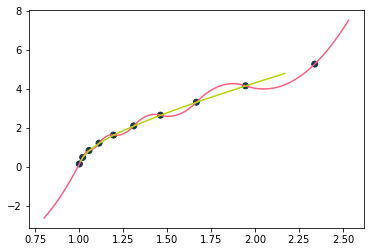

In [98]:
def draw_all():
    t_list = [el for el in np.arange(p[0][0] - 0.2, p[-1][0] + 0.2, 0.01)]
    global trad_spline
    trad_func = get_trad_spline_func(p)
    x = [el for el in t_list]
    y = [trad_func(el) for el in t_list]
    trad_spline = [[el[0], el[1]] for el in zip(x, y)]
    plt.plot(x, y, c="#FE6083")

    t_list = [el for el in np.arange(0.95, 9.15, 0.05)]
    global spline
    spline = [P(el) for el in t_list]
    q_list = [el for el in np.arange(0, len(p), 1)]
    global q
    q = [P(el) for el in q_list]
    x = [el[0] for el in spline]
    y = [el[1] for el in spline]
    plt.plot(x, y, "#B8D20C")

    x = p[:, 0]
    y = p[:, 1]
    plt.scatter(x, y, c=["#11344A" for _ in np.arange(10)])


draw_all()

In [15]:
def output_points():
    print("Original points: ")
    str_ = []
    for item in p:
        str_.append(f"({item[0]}, {item[1]})")
    print(",".join(str_))

    str_ = []
    print("\n\nB-spline points: ")
    for item in spline:
        str_.append(f"({item[0]}, {item[1]})")
    print(",".join(str_))

    str_ = []
    print("\n\nTrad-spline points: ")
    for item in trad_spline:
        str_.append(f"({item[0]}, {item[1]})")
    print(",".join(str_))

    str_ = []
    print("\n\nQ points: ")
    for item in q:
        str_.append(f"({item[0]}, {item[1]})")
    print(",".join(str_))


output_points()

Original points: 
(0.032, 0.171),(0.262, 0.63),(0.818, 1.221),(1.711, 1.732),(2.259, 1.903),(3.44, 1.992),(4.567, 1.735),(5.465, 1.23),(6.019, 0.641)


B-spline points: 
(0.05675, 0.207),(0.06355, 0.22311),(0.07084, 0.23994),(0.07863, 0.25749),(0.08691, 0.27576),(0.09569, 0.29475),(0.10496, 0.31446),(0.11473, 0.33489),(0.12499, 0.35604),(0.13575, 0.37791),(0.147, 0.4005),(0.15891, 0.42362),(0.17163, 0.44706),(0.18517, 0.47084),(0.19952, 0.49494),(0.21469, 0.51938),(0.23067, 0.54414),(0.24747, 0.56924),(0.26508, 0.59466),(0.28351, 0.62042),(0.30275, 0.6465),(0.32281, 0.67292),(0.34368, 0.69966),(0.36537, 0.72674),(0.38787, 0.75414),(0.41119, 0.78188),(0.43532, 0.80994),(0.46027, 0.83834),(0.48603, 0.86706),(0.51261, 0.89612),(0.54, 0.9255),(0.56822, 0.95495),(0.59729, 0.9842),(0.62719, 1.01325),(0.65794, 1.0421),(0.68953, 1.07075),(0.72197, 1.0992),(0.75524, 1.12745),(0.78936, 1.1555),(0.82432, 1.18335),(0.86013, 1.211),(0.89677, 1.23845),(0.93426, 1.2657),(0.97259, 1.29275),(1.01177, 1